In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import del dataset corregido desde repo GitHub: https://github.com/lagabyok/SalariosAnalisis/tree/main
data_salarios = pd.read_csv('https://raw.githubusercontent.com/lagabyok/SalariosAnalisis/refs/heads/main/dataset%20para%20analisis/dataset_final_completo_corr.csv?token=GHSAT0AAAAAADEBZWWM2TQ4HGFIJVXFOXEU2BTKNMA')

## Limpieza del dataset

In [5]:
data_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438 entries, 0 to 8437
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Posición/rol                    8438 non-null   object 
 1   Salario bruto mensual           8438 non-null   object 
 2   Seniority/ años de experiencia  8438 non-null   object 
 3   Ubicación                       8438 non-null   object 
 4   Carga horaria                   8438 non-null   object 
 5   Género                          8438 non-null   object 
 6   Modalidad                       8438 non-null   object 
 7   Moneda                          8438 non-null   object 
 8   linea_original                  8438 non-null   int64  
 9   salario_min                     8438 non-null   float64
 10  salario_max                     8438 non-null   float64
 11  Seniority rango                 8438 non-null   object 
dtypes: float64(2), int64(1), object(9)

In [6]:
# Cambio nombre de algunas columnas y dropeo las que no tienen uso, asi como las que tienen el nombre original
data_salarios['Posicion_rol'] = data_salarios['Posición/rol']
data_salarios['Salario_bruto_mens'] = data_salarios['Salario bruto mensual']
data_salarios['Ubicacion'] = data_salarios['Ubicación']
data_salarios['Genero'] = data_salarios['Género']
data_salarios['Carga_horaria'] = data_salarios['Carga horaria']
data_salarios['Seniority_rango'] = data_salarios['Seniority rango']

data_salarios_drop = data_salarios.drop(columns=['Carga horaria', 'Posición/rol', 'Salario bruto mensual', 'Seniority/ años de experiencia', 'Ubicación', 'Género', 'Seniority rango', 'linea_original', 'salario_min', 'Salario_bruto_mens'])

data_salarios_drop.head()

,Modalidad,Moneda,salario_max,Posicion_rol,Ubicacion,Genero,Carga_horaria,Seniority_rango
0,no disponible,ARS,1800000.0,Fullstack Developer,no disponible,no disponible,no disponible,0-2 años
1,no disponible,USD,1200.0,Backend Developer,no disponible,no disponible,no disponible,0-2 años
2,no disponible,ARS,1091000.0,Frontend Developer,no disponible,no disponible,no disponible,0-2 años
3,no disponible,USD,2100.0,Frontend Developer,no disponible,no disponible,no disponible,3-5 años
4,no disponible,USD,6500.0,Fullstack Developer,no disponible,no disponible,no disponible,No disponible


In [7]:
# Reviso todos los valores unicos de cada columna
for c in data_salarios_drop.columns:
  print(f'Valores en {c}: ')
  print(list(data_salarios_drop[c].unique()))

Valores en Modalidad: 
['no disponible', 'Híbrido (presencial y remoto)', '100% remoto', '100% presencial', 'Remoto para Argentina', 'Presencial', 'Remoto para el exterior', 'Hibrida']
Valores en Moneda: 
['ARS', 'USD', 'mixto', 'usd', 'ars']
Valores en salario_max: 
[np.float64(1800000.0), np.float64(1200.0), np.float64(1091000.0), np.float64(2100.0), np.float64(6500.0), np.float64(2000.0), np.float64(1900000.0), np.float64(850000.0), np.float64(4200.0), np.float64(14000.0), np.float64(3300000.0), np.float64(1500000.0), np.float64(1600.0), np.float64(1647.0), np.float64(1389261.0), np.float64(4400000.0), np.float64(850.0), np.float64(5000.0), np.float64(1200000.0), np.float64(2050000.0), np.float64(8000.0), np.float64(710.0), np.float64(750000.0), np.float64(2600000.0), np.float64(1700.0), np.float64(2450000.0), np.float64(3600.0), np.float64(880000.0), np.float64(4800.0), np.float64(657.0), np.float64(3500.0), np.float64(2678000.0), np.float64(5500.0), np.float64(2200000.0), np.float

In [8]:
# Hago una copia del dataset para evitar pisar los cambios
data_salarios_copy = data_salarios_drop.copy()

In [9]:
# Agrupo los registros para Modalidad, Carga Horario, Moneda y Genero
data_salarios_copy['Modalidad'] = data_salarios_copy.apply(lambda row: 'Presencial' if row['Modalidad'] in ( '100% presencial', 'Presencial') \
                                                               else ('Remoto' if row['Modalidad'] in ('100% remoto', 'Remoto para Argentina', 'Remoto para el exterior') \
                                                               else ('Hibrido' if row['Modalidad'] in (['Híbrido (presencial y remoto)', 'Hibrida']) \
                                                               else "No disponible")), axis=1)

data_salarios_copy['Carga_horaria'] = data_salarios_copy.apply(lambda row: 'Part-time' if row['Carga_horaria'] in ('Part-Time', 'PartTime (Contractor/Freelancer)', 'PartTime (Relación de dependencia)') \
                                                               else ('Full-time' if row['Carga_horaria'] in ('Full-Time', 'FullTime (Relación de dependencia)', 'FullTime (Contractor/Freelancer)') \
                                                               else "No disponible / Otro"), axis=1)

data_salarios_copy['Moneda'] = data_salarios_copy.apply(lambda row: 'ARS' if row['Moneda'] in ('ARS', 'ars', 'usd') \
                                                               else ('USD' if row['Moneda'] in ('USD') \
                                                               else ('Mixto' if row['Moneda'] in ('mixto') \
                                                               else "No disponible")), axis=1)
# Los registros en usd, están cargados en $ arg ojO

data_salarios_copy['Genero'] = data_salarios_copy.apply(lambda row: 'Hombre' if row['Genero'] in ('Hombre Cis', 'Hombre') \
                                                               else ('Mujer' if row['Genero'] in ('Mujer Cis', 'Mujer') \
                                                               else ('Otros' if row['Genero'] in ('No binarie', 'Prefiero no decir', 'Trans', 'Queer', 'Lesbiana', 'Agénero') \
                                                               else "No disponible")), axis=1)

In [11]:
# @title Agrupación de los registros de roles en 6 categorías

'''
Se agrupan todos los registros en 6 categorías. Esto se realiza con el fin de unificar y reducir la cantidad de categorías para el análisis.
'''


# Mapping de posiciones segun 6 categorías

'''
Fullstack Developer', 'Backend Developer', 'Frontend Developer', 'QA Manual Tester', 'Project Manager', 'UX/UI Designer', 'QA Automation Engineer', 'iOS Developer', 'Product Manager', 'Business Analyst',
'Android Developer', 'Solutions Architect', 'Data Analyst', 'Functional Analyst', 'DevOps Engineer', 'Technical Support', 'Data Engineer', 'Cibersecurity Engineer', 'Data Scientist', 'Product Owner', 'Product Designer',
 'UX Researcher', 'Scrum Master', 'Blockchain Developer', 'Manager / Director', 'Technical Leader', 'Developer', 'SysAdmin / DevOps / SRE', 'Consultant', 'Architect', 'BI Analyst / Data Analyst', 'Designer', 'UX Designer',
 'VP / C-Level', 'Networking', 'Infosec', 'QA / Tester', 'Sales / Pre-Sales', 'DBA (Database Administrator)', 'Recruiter', 'Engineer', 'HelpDesk', 'RPA', 'AI Engineer', 'UX Writer', 'No sé encuentra acá', 'Staff Engineer',
 'Docente', 'Finance', 'Fuera de IT', 'engineer', 'Marketing', 'Mechanical engineer', 'Storage / Backup', 'Pasé por varios puestos pero ninguno fijo', 'embedded engineer', 'Dataentry', 'Smart contracts engineer',
 'Firmware Engineer', 'Configuration Analyst', 'Middleware', 'Technical Writer', 'GeneXus Analyst', 'Administrativo', 'I+D', 'Electronic Engineer', 'Diseño + coordinación de área creativa', 'Project assistant', '
 System Analyst', 'Joven profesional IT', 'Ingeniero en Sistemas Informáticos', 'Systems Analyst', 'Game designer', 'compras + ventas', 'CIO', 'Help Desk', 'Mobile Developer', 'QA/Tester', 'Tech Leader', 'PO/PM',
 'Analista Funcional
 '''

# Define dict of roles to categories
positions_dict = {
    # Software Development
    'Fullstack Developer': 'Desarrollo de software',
    'Backend Developer': 'Desarrollo de software',
    'Frontend Developer': 'Desarrollo de software',
    'iOS Developer': 'Desarrollo de software',
    'Android Developer': 'Desarrollo de software',
    'Blockchain Developer': 'Desarrollo de software',
    'Developer': 'Desarrollo de software',
    'Mobile Developer': 'Desarrollo de software',
    'Smart contracts engineer': 'Desarrollo de software',
    'Embedded engineer': 'Desarrollo de software',
    'Firmware Engineer': 'Desarrollo de software',
    'Game designer': 'Desarrollo de software',
    'GeneXus Analyst': 'Desarrollo de software',

    # Data & AI
    'Data Analyst': 'Data & AI',
    'BI Analyst / Data Analyst': 'Data & AI',
    'Data Engineer': 'Data & AI',
    'Data Scientist': 'Data & AI',
    'AI Engineer': 'Data & AI',
    'RPA': 'Data & AI',
    'Dataentry': 'Data & AI',

    # IT Infrastructure & Support
    'DevOps Engineer': 'Infrastructura y Soporte IT',
    'SysAdmin / DevOps / SRE': 'Infrastructura y Soporte IT',
    'Technical Support': 'Infrastructura y Soporte IT',
    'HelpDesk': 'Infrastructura y Soporte IT',
    'Help Desk': 'Infrastructura y Soporte IT',
    'Networking': 'Infrastructura y Soporte IT',
    'Infosec': 'Infrastructura y Soporte IT',
    'Cibersecurity Engineer': 'Infrastructura y Soporte IT',
    'DBA (Database Administrator)': 'Infrastructura y Soporte IT',
    'Storage / Backup': 'Infrastructura y Soporte IT',
    'Middleware': 'Infrastructura y Soporte IT',

    # QA & Testing
    'QA Manual Tester': 'QA & Testing',
    'QA Automation Engineer': 'QA & Testing',
    'QA / Tester': 'QA & Testing',
    'QA/Tester': 'QA & Testing',

    # Product, Project & Business
    'Product Manager': 'Producto, Proyectos y Análisis de Negocio',
    'Product Owner': 'Producto, Proyectos y Análisis de Negocio',
    'PO/PM': 'Producto, Proyectos y Análisis de Negocio',
    'Project Manager': 'Producto, Proyectos y Análisis de Negocio',
    'Project assistant': 'Producto, Proyectos y Análisis de Negocio',
    'Business Analyst': 'Producto, Proyectos y Análisis de Negocio',
    'Functional Analyst': 'Producto, Proyectos y Análisis de Negocio',
    'Analista Funcional': 'Producto, Proyectos y Análisis de Negocio',
    'Scrum Master': 'Producto, Proyectos y Análisis de Negocio',
    'Consultant': 'Producto, Proyectos y Análisis de Negocio',
    'Configuration Analyst': 'Producto, Proyectos y Análisis de Negocio',
    'System Analyst': 'Producto, Proyectos y Análisis de Negocio',
    'Systems Analyst': 'Producto, Proyectos y Análisis de Negocio',
    'Ingeniero en Sistemas Informáticos': 'Producto, Proyectos y Análisis de Negocio',
    'Joven profesional IT': 'Producto, Proyectos y Análisis de Negocio',

    # Design & UX
    'UX/UI Designer': 'Diseño & UX',
    'Product Designer': 'Diseño & UX',
    'UX Designer': 'Design & UX',
    'UX Researcher': 'Design & UX',
    'UX Writer': 'Design & UX',
    'Designer': 'Design & UX',
    'Diseño + coordinación de área creativa': 'Design & UX',

    # Leadership / Cross-functional / Other
    'Technical Leader': 'Liderazgo / Otros',
    'Tech Leader': 'Liderazgo / Otros',
    'Staff Engineer': 'Liderazgo / Otros',
    'Solutions Architect': 'Liderazgo / Otros',
    'Architect': 'Liderazgo / Otros',
    'Manager / Director': 'Liderazgo / Otros',
    'VP / C-Level': 'Liderazgo / Otros',
    'CIO': 'Liderazgo / Otros',
    'Recruiter': 'Liderazgo / Otros',
    'Engineer': 'Liderazgo / Otros',
    'engineer': 'Liderazgo / Otros',
    'Docente': 'Liderazgo / Otros',
    'Finance': 'Liderazgo / Otros',
    'Marketing': 'Liderazgo / Otros',
    'compras + ventas': 'Liderazgo / Otros',
    'Administrativo': 'Liderazgo / Otros',
    'I+D': 'Liderazgo / Otros',
    'Electronic Engineer': 'Liderazgo / Otros',
    'Mechanical engineer': 'Liderazgo / Otros',
    'No sé encuentra acá': 'Liderazgo / Otros',
    'Pasé por varios puestos pero ninguno fijo': 'Liderazgo / Otros',
}

data_salarios_copy['grupo_PosicionRol'] = (
    data_salarios_copy['Posicion_rol']  # or whatever your column is named
        .map(positions_dict)
        .fillna('Sin informacion')
)

data_salarios_copy.drop(columns=['Posicion_rol'], inplace=True)

In [12]:
# Reviso todos los valores unicos de cada columna luego del proceso de unificación y agrupación de los registros
for c in data_salarios_copy.columns:
  print(f'Valores en {c}: ')
  print(list(data_salarios_copy[c].unique()))

Valores en Modalidad: 
['No disponible', 'Hibrido', 'Remoto', 'Presencial']
Valores en Moneda: 
['ARS', 'USD', 'Mixto']
Valores en salario_max: 
[np.float64(1800000.0), np.float64(1200.0), np.float64(1091000.0), np.float64(2100.0), np.float64(6500.0), np.float64(2000.0), np.float64(1900000.0), np.float64(850000.0), np.float64(4200.0), np.float64(14000.0), np.float64(3300000.0), np.float64(1500000.0), np.float64(1600.0), np.float64(1647.0), np.float64(1389261.0), np.float64(4400000.0), np.float64(850.0), np.float64(5000.0), np.float64(1200000.0), np.float64(2050000.0), np.float64(8000.0), np.float64(710.0), np.float64(750000.0), np.float64(2600000.0), np.float64(1700.0), np.float64(2450000.0), np.float64(3600.0), np.float64(880000.0), np.float64(4800.0), np.float64(657.0), np.float64(3500.0), np.float64(2678000.0), np.float64(5500.0), np.float64(2200000.0), np.float64(1790000.0), np.float64(750.0), np.float64(1243000.0), np.float64(1165000.0), np.float64(1000.0), np.float64(5833.0), np.

In [13]:
# Se unifica el salario a pesos argentinos definiendo un precio del dolar
pesos_x_dolar = 1200
data_salarios_copy['Salario_pesos'] = data_salarios_copy.apply(lambda row: row['salario_max'] if row['Moneda'] == 'ARS' else row['salario_max']*pesos_x_dolar, axis=1)
data_salarios_copy.drop(columns=['salario_max'], inplace=True)

#data_salarios_copy.head()

In [14]:
# Se exluyen aquellos registros con pagos en Moneda Mixto. No es posible definir cuánto se corresponde a dolares y cuánto a pesos argentinos
data_salarios_noMix = data_salarios_copy[data_salarios_copy['Moneda'] != 'Mixto']
data_salarios_noMix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7724 entries, 0 to 8437
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Modalidad          7724 non-null   object 
 1   Moneda             7724 non-null   object 
 2   Ubicacion          7724 non-null   object 
 3   Genero             7724 non-null   object 
 4   Carga_horaria      7724 non-null   object 
 5   Seniority_rango    7724 non-null   object 
 6   grupo_PosicionRol  7724 non-null   object 
 7   Salario_pesos      7724 non-null   float64
dtypes: float64(1), object(7)
memory usage: 543.1+ KB


In [ ]:
# @title Descargar del dataset limpio (Opcional)

from google.colab import files

data_salarios_noMix.to_csv('data_salarios_noMix.csv', index=False)
files.download('data_salarios_noMix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resultados y gráficos

In [15]:
# Se seleccionan los valores a incluir en el análisis, exluyendo aquellos computados como "No disponible"
dict_cat ={
    'Modalidad' : ['Hibrido', 'Remoto', 'Presencial'],
    #'Genero': ['Hombre', 'Mujer', 'Otros'],
    'Carga_horaria': ['Part-time', 'Full-time'],
    'Seniority_rango': ['0-2 años', '3-5 años', '6-10 años', '11-20 años', 'Más de 20 años']
}

In [16]:
# Printeo todos los roles por grupos para analizar luego
data_salarios_noMix.grupo_PosicionRol.unique()

array(['Desarrollo de software', 'QA & Testing',
       'Producto, Proyectos y Análisis de Negocio', 'Diseño & UX',
       'Liderazgo / Otros', 'Data & AI', 'Infrastructura y Soporte IT',
       'Design & UX', 'Sin informacion'], dtype=object)

In [33]:
pos_rol = 'Design & UX'

Modalidad 0
Carga_horaria 1
Seniority_rango 2


<ipython-input-34-c6f81abac9bd>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(['{:.0f}'.format(x) for x in current_values])
<ipython-input-34-c6f81abac9bd>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(['{:.0f}'.format(x) for x in current_values])
<ipython-input-34-c6f81abac9bd>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(['{:.0f}'.format(x) for x in current_values])


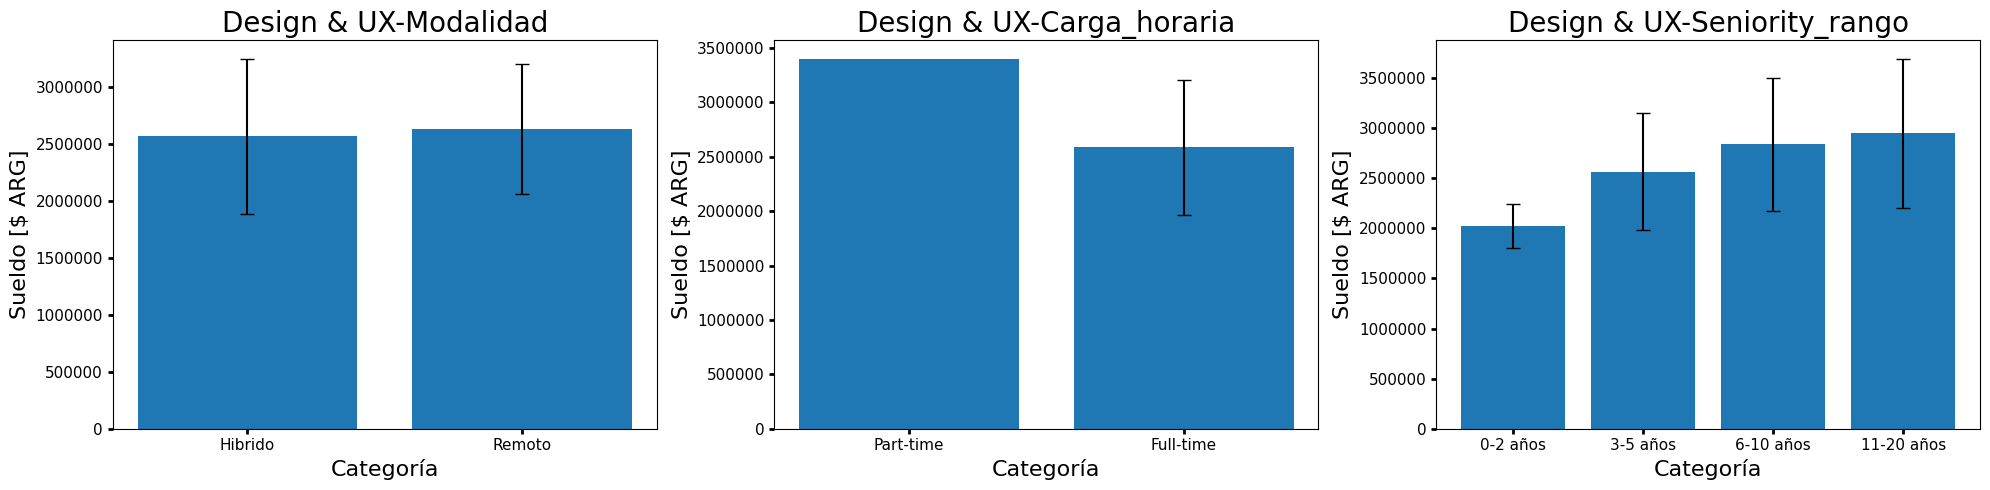

In [34]:
# @title Plots por grupo de roles

df_x_grupo = data_salarios_noMix[data_salarios_noMix['grupo_PosicionRol'] == pos_rol]

# Remuevo los valores de las colas: percentil 5 y 95
percentil_95 = df_x_grupo['Salario_pesos'].quantile(0.95)
percentil_5 = df_x_grupo['Salario_pesos'].quantile(0.5)

df_x_grupo_corr = df_x_grupo[
    (df_x_grupo['Salario_pesos']>= percentil_5) &
    (df_x_grupo['Salario_pesos'] <= percentil_95)
]

# Inicio del plot por roles por grupo
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

i = 0

for c in dict_cat.keys():

  print(c, i)

  labels_Mod = list(dict_cat[c])
  means_Mod = [df_x_grupo_corr[df_x_grupo_corr[c] == v]['Salario_pesos'].mean() for v in dict_cat[c]]
  std_Mod = [df_x_grupo_corr[df_x_grupo_corr[c] == v]['Salario_pesos'].std() for v in dict_cat[c]]

  # First Subplot: Basic Bar Plot with Error Bars
  axes[i].bar(labels_Mod, means_Mod, yerr=std_Mod, capsize=5)
  axes[i].set_title(f'{pos_rol}-{c}', fontsize = 20)
  axes[i].set_xlabel('Categoría', fontsize = 16)
  axes[i].set_ylabel('Sueldo [$ ARG]', fontsize = 16)
  axes[i].tick_params(axis='both', which='major', width=2, labelsize=11)
  current_values = axes[i].get_yticks()
  # using format string '{:.0f}' here but you can choose others
  axes[i].set_yticklabels(['{:.0f}'.format(x) for x in current_values])
  i += 1

  # Adjust layout to prevent overlapping
  plt.tight_layout()
  # Show the plot
plt.show()

In [35]:
# @title Resumen por variables
for k in dict_cat.keys():
  print(df_x_grupo_corr.groupby(k).describe())

          Salario_pesos                                                     \
                  count          mean            std        min        25%   
Modalidad                                                                    
Hibrido            39.0  2.566640e+06  679585.338684  1800000.0  2000000.0   
Remoto             35.0  2.631670e+06  568708.102194  1800000.0  2182000.0   

                                            
                 50%        75%        max  
Modalidad                                   
Hibrido    2340000.0  3040800.0  4048117.0  
Remoto     2500000.0  3057850.0  4000000.0  
              Salario_pesos                                          \
                      count          mean            std        min   
Carga_horaria                                                         
Full-time              73.0  2.586403e+06  623290.674654  1800000.0   
Part-time               1.0  3.400000e+06            NaN  3400000.0   

                            

# Useless

In [ ]:
df_x_grupo_corr.groupby(c).describe()

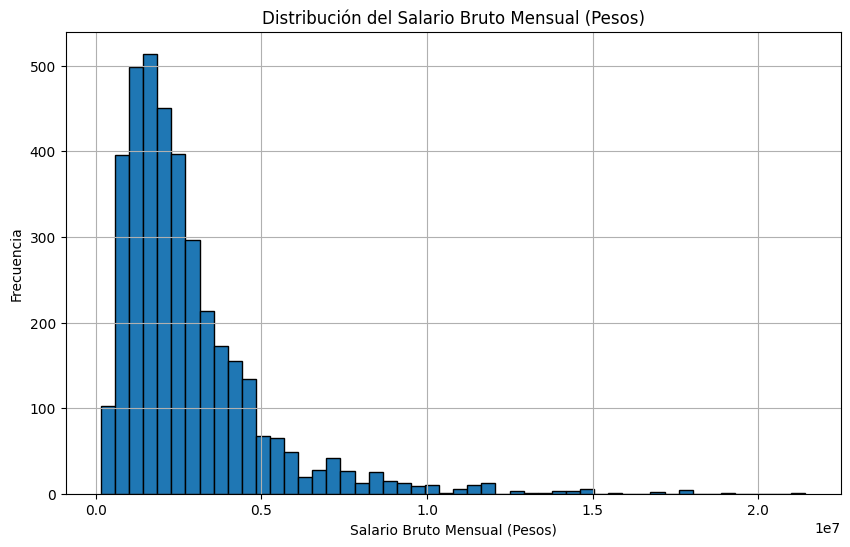

5171999.999999998


In [ ]:
df_x_grupo = data_salarios_noMix[data_salarios_noMix['grupo_PosicionRol'] == 'Desarrollo de software']

plt.figure(figsize=(10, 6))
df_x_grupo['Salario_pesos'].hist(bins=50, edgecolor='black')
plt.title('Distribución del Salario Bruto Mensual (Pesos)')
plt.xlabel('Salario Bruto Mensual (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

percentil_90 = df_x_grupo['Salario_pesos'].quantile(0.90)
print(percentil_90)

In [ ]:
df_x_grupo_corr.groupby(c).describe()

Salario_pesos                                         \
                        count          mean           std        min   
Seniority_rango                                                        
0-2 años                142.0  2.811921e+06  8.413088e+05  2200000.0   
11-20 años              164.0  3.733310e+06  1.195654e+06  2200000.0   
3-5 años               1082.0  3.551592e+06  1.094983e+06  2200000.0   
6-10 años               216.0  3.716098e+06  1.151682e+06  2200000.0   
Más de 20 años           39.0  4.069025e+06  1.600875e+06  2200000.0   
No disponible            61.0  4.572584e+06  1.233573e+06  2400000.0   

                                                              
                        25%        50%        75%        max  
Seniority_rango                                               
0-2 años         2400000.00  2500000.0  2900000.0  6134400.0  
11-20 años       2800000.00  3500000.0  4236250.0  7000000.0  
3-5 años         2667450.00  3282700.0  4200000.0  6999600.0  
6-10 años        2867981.25  3423500.0  4421625.0  7000000.0  
Más de 20 años   2700000.00  3500000.0  5250000.0  7058760.0  
No disponible    3600000.00  4560000.0  5400000.0  7050000.0